<a href="https://colab.research.google.com/github/dlskawns/coz-project/blob/main/CP2_cx_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 6/15 - 9,10기 CP2 경험 분석

## 환경설정


In [1]:
# 경고 없애기
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
## 나눔폰츠 설치 -> 실행 후 런타임 리셋해야함
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
# 나눔폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-eco.
(Reading database ... 155650 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import font_manager,rc

font_list = fm.findSystemFonts()
font_path= '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

## 데이터셋 불러오기

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

# CP1 데이터셋 (사용안함)
df1 = pd.read_excel('/content/drive/MyDrive/고객만족도조사0615_2xlsx.xlsx', sheet_name= 6)

# CP2 데이터셋 
df2 = pd.read_excel('/content/drive/MyDrive/고객만족도조사0615_2xlsx.xlsx', sheet_name= 7)


## 초간단 EDA 및 특성공학

In [8]:
# 특성 확인
df2.columns

Index(['개인 정보 수집 동의 ', '휴대폰 번호', '기수', '연령', '성별', '최종학력', '전공',
       '타사 프로그램 수강여부 ', '타사 프로그램 만족도 ', '소요시간', '자기주도학습 점수', '근무 희망 분야 ',
       '주제 선정 방법', 'CP2 기업 프로젝트 선정 이유', 'CP2 자기 주도  프로젝트 선정 이유',
       'CP2에서 가장 어려운 점(기업)', 'CP2에서 가장 어려운 점(자기 주도 프로젝트)', 'CP2 기업 프로젝트 추천점수',
       'CP2 자기 주도 프로젝트 추천점수', 'CP2 주제', 'CP2 주제 선정 이유',
       'CP2 주제와 연관 있는 Section', 'CP2 완성도에 대한 만족도', 'CP1~CP2 심리적 안전감 변화 ',
       'CP1~CP2 심리적 안전감 변화 이유', '심리적 불안전 요인', '심리적 불안전 해소에 도움되는 것 ', '기타의견',
       'Submitted At', 'Token'],
      dtype='object')

In [260]:
# 기수 및 기수 별 인원확인
for i, j in zip(df2.기수.value_counts().index, df2.기수.value_counts().values):
  print(f"{int(i)}기: {j}명")

7기: 20명
8기: 15명
9기: 15명
10기: 10명


In [6]:
# 추천점수 결측치 해결
df2['CP2 자기 주도 프로젝트 추천점수'] = df2['CP2 자기 주도 프로젝트 추천점수'].fillna('').map(lambda x: int(x[0]) if x != '' else x)
df2['CP2 기업 프로젝트 추천점수'] = df2['CP2 기업 프로젝트 추천점수'].fillna('').map(lambda x: int(x[0]) if x != '' else x)
# 만족도 결측치 해결
df2['CP2 완성도에 대한 만족도'] = df2['CP2 완성도에 대한 만족도'].map(lambda x: int(x[0]))

In [7]:
# 9,10기 데이터
df910 = df2[(df2['기수']==9)|(df2['기수']==10)]

# 7,8기 데이터
df78 = df2[(df2['기수']==7)|(df2['기수']==8)]

In [8]:
# 기업 분류와 코드스테이츠 여부를 파악하는 컬럼 이름 변경
df910.rename(columns= {'Unnamed: 34': '기업여부', 'Unnamed: 35': '코드여부'}, inplace = True)

#### [전체] 완성 만족도 및 추천 점수 데이터

In [263]:
import numpy as np
#평균 점수 파악
print(f"7,8기 자기주도 프로젝트 추천점수 평균: {round(np.mean(df78[df78['CP2 자기 주도 프로젝트 추천점수']!='']['CP2 자기 주도 프로젝트 추천점수']),2)}")
print(f"7,8기 기업 프로젝트 추천점수 평균: {round(np.mean(df78[df78['CP2 기업 프로젝트 추천점수']!='']['CP2 기업 프로젝트 추천점수']),2)}")
print(f"\n9,10기 자기주도 프로젝트 추천점수 평균: {round(np.mean(df910[df910['CP2 자기 주도 프로젝트 추천점수']!='']['CP2 자기 주도 프로젝트 추천점수']),2)}")
print(f"9,10기 기업 프로젝트 추천점수 평균: {round(np.mean(df910[df910['CP2 기업 프로젝트 추천점수']!='']['CP2 기업 프로젝트 추천점수']),2)}")

7,8기 자기주도 프로젝트 추천점수 평균: 4.89
7,8기 기업 프로젝트 추천점수 평균: 4.81

9,10기 자기주도 프로젝트 추천점수 평균: 4.0
9,10기 기업 프로젝트 추천점수 평균: 4.7


9,10기 들어 자기주도 프로젝트 진행한 수강생들의 평균 점수가 더 낮음

In [90]:
print(f"전체 자기 주도 프로젝트 추천점수 평균: {np.mean(df2[df2['CP2 자기 주도 프로젝트 추천점수']!='']['CP2 자기 주도 프로젝트 추천점수'])}")
print(f"전체 기업 프로젝트 추천점수 평균: {np.mean(df2[df2['CP2 기업 프로젝트 추천점수']!='']['CP2 기업 프로젝트 추천점수'])}")

전체 자기 주도 프로젝트 추천점수 평균: 4.571428571428571
전체 기업 프로젝트 추천점수 평균: 4.760869565217392


In [91]:
print(f"7,8기 CP2 완성도에 대한 만족도 평균: {np.mean(df78[df78['CP2 완성도에 대한 만족도']!='']['CP2 완성도에 대한 만족도'])}")
print(f"9,10기 CP2 완성도에 대한 만족도 평균: {np.mean(df910[df910['CP2 완성도에 대한 만족도']!='']['CP2 완성도에 대한 만족도'])}")
print(f"전체 CP2 완성도에 대한 만족도 평균: {np.mean(df2[df2['CP2 완성도에 대한 만족도']!='']['CP2 완성도에 대한 만족도'])}")

7,8기 CP2 완성도에 대한 만족도 평균: 4.228571428571429
9,10기 CP2 완성도에 대한 만족도 평균: 3.92
전체 CP2 완성도에 대한 만족도 평균: 4.1


In [9]:
df910['CP2에서 가장 어려운 점(기업)'].fillna('없음', inplace = True)
df910['CP2에서 가장 어려운 점(자기 주도 프로젝트)'].fillna('없음', inplace = True)

df910['CP2 어려운점'] = df910['CP2에서 가장 어려운 점(기업)']+df910['CP2에서 가장 어려운 점(자기 주도 프로젝트)']
df910['CP2 어려운점'] = df910['CP2 어려운점'].map(lambda x: x.replace('없음',''))

#### [기업 별] 9,10기 완성 만족도 및 추천 점수 데이터

In [10]:

# 개인, 기업 프로젝트 컬럼을 합쳐주는 작업
df910['추천점수'] = df910['CP2 자기 주도 프로젝트 추천점수'].map(lambda x: 0 if x == '' else x)+\
df910['CP2 기업 프로젝트 추천점수'].map(lambda x: 0 if x == '' else x)

# 추천점수 파악을 위한 새로운 데이터프레임 생성
df_rec = df910.groupby('기업여부')['CP2 완성도에 대한 만족도','추천점수'].mean().reset_index()

#인원 파악을 위한 '인원'컬럼 추가
df_rec['인원'] = df910.groupby('기업여부')['기업여부'].count().values

# 기업별 완성 만족도 및 추천 점수, 인원
df_rec.rename(columns = {'CP2 완성도에 대한 만족도': '만족도'}, inplace = True)
df_rec

,기업여부,만족도,추천점수,인원
0,개인,2.40,4.000000,5
1,넥스트랩,2.50,1.500000,2
2,누비랩,4.50,4.500000,2
3,분석&추천,5.00,5.714286,7
4,와플,2.75,3.750000,4
5,파이토치,5.00,7.000000,1
6,후케어스코리아,5.25,5.000000,4


In [11]:
# 멀티 플랏을 위한 멜팅작업
df_melt = df_rec[['기업여부','만족도','추천점수']].melt(id_vars = '기업여부', var_name = '항목', value_name = '점수' )

In [12]:
import seaborn as sns

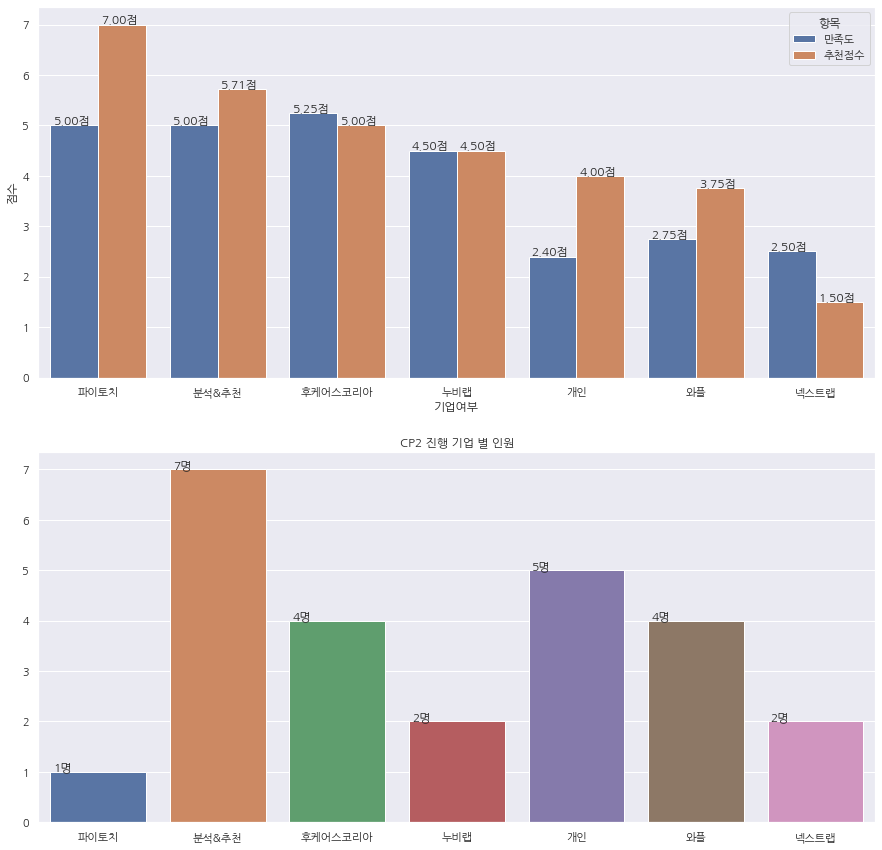

In [298]:
# 추천점수 높은 순으로 나열
fig, ax = plt.subplots(2,1)
ax1 = sns.barplot(x = '기업여부', y = '점수', hue = '항목', data = df_melt, 
            order = df_rec.sort_values(ascending = False, by = '추천점수')['기업여부'].values, ax = ax[0])
for p in ax1.patches:
  ax1.annotate('{:.2f}점'.format(p.get_height(), p.get_height()/ttl*100), (p.get_x()+0.025, p.get_height()+0.01), size=12)
plt.title('CP2 진행 기업 별 만족도 및 추천점수')

ax2 = sns.barplot(df_rec.sort_values(ascending = False, by = '추천점수')['기업여부'].values, df_rec.sort_values(ascending = False, by = '추천점수')['인원'].values, ax = ax[1]) 
for p in ax2.patches:
  ax2.annotate('{:.0f}명'.format(p.get_height(), p.get_height()/ttl*100), (p.get_x()+0.025, p.get_height()+0.01), size=12)

plt.title('CP2 진행 기업 별 인원')
plt.rcParams['figure.figsize'] = (15,15);
plt.show();

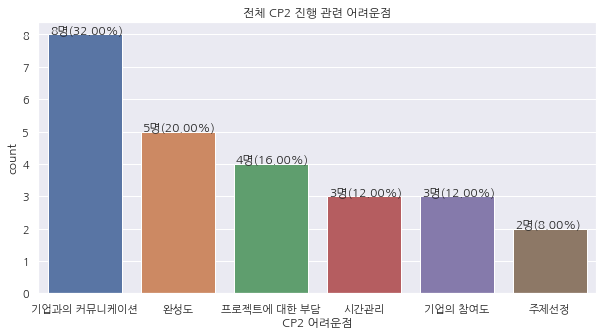

In [269]:
ax = sns.countplot(df910['CP2 어려운점'], order = df910['CP2 어려운점'].value_counts().index)
ttl = len
for p in ax.patches:
  ax.annotate('{:.0f}명({:.2f}%)'.format(p.get_height(), p.get_height()/ttl*100), (p.get_x()+0.025, p.get_height()+0.01), size=12)
plt.title('전체 CP2 진행 관련 어려운점')
plt.rcParams['figure.figsize'] = (10,5)
plt.show();

In [311]:
df910.columns

Index(['개인 정보 수집 동의 ', '휴대폰 번호', '기수', '연령', '성별', '최종학력', '전공',
       '타사 프로그램 수강여부 ', '타사 프로그램 만족도 ', '소요시간', '자기주도학습 점수', '근무 희망 분야 ',
       '주제 선정 방법', 'CP2 기업 프로젝트 선정 이유', 'CP2 자기 주도  프로젝트 선정 이유',
       'CP2에서 가장 어려운 점(기업)', 'CP2에서 가장 어려운 점(자기 주도 프로젝트)', 'CP2 기업 프로젝트 추천점수',
       'CP2 자기 주도 프로젝트 추천점수', 'CP2 주제', 'CP2 주제 선정 이유',
       'CP2 주제와 연관 있는 Section', 'CP2 완성도에 대한 만족도', 'CP1~CP2 심리적 안전감 변화 ',
       'CP1~CP2 심리적 안전감 변화 이유', '심리적 불안전 요인', '심리적 불안전 해소에 도움되는 것 ', '기타의견',
       'Submitted At', 'Token', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', '기업여부', '코드여부', '추천점수', 'CP2 어려운점'],
      dtype='object')

In [15]:
import numpy as np
rec_scores = []
sat_scores = []
for i in df910['CP2 어려운점'].value_counts().index:
  rec_scores.append(round(np.mean(df910[df910['CP2 어려운점']==i]['추천점수']),2))
  sat_scores.append(round(np.mean(df910[df910['CP2 어려운점']==i]['CP2 완성도에 대한 만족도']),2))

In [25]:
df910['CP2 어려운점'].value_counts().index[i]

'기업과의 커뮤니케이션'

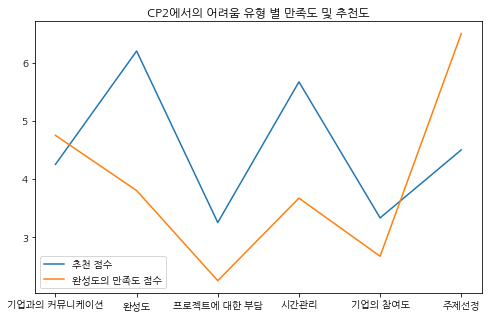

In [26]:
ax1 = sns.lineplot(df910['CP2 어려운점'].value_counts().index, rec_scores)
ax2 = sns.lineplot(df910['CP2 어려운점'].value_counts().index, sat_scores)

plt.rcParams['figure.figsize'] = (8,5)
plt.legend(['추천 점수','완성도의 만족도 점수'])
plt.title('CP2에서의 어려움 유형 별 만족도 및 추천도')
plt.show()

유형 별로 보았을 때,   
**'프로젝트에 대한 부담'**과 **'기업의 참여도'**가 추천 점수 및 만족도 점수가 매우 낮음을 확인

In [334]:
# 프로젝트에 대한 부담 유형의 기업여부 및 추천점수, 만족도점수 파악
df910[df910['CP2 어려운점']=='프로젝트에 대한 부담'][['기업여부','추천점수', 'CP2 완성도에 대한 만족도','기타의견']]

,기업여부,추천점수,CP2 완성도에 대한 만족도,기타의견
40,개인,4,2,개개인의 역량에 따른 프로젝트 난이도에 대한 계획 설정을 스스로 조율하기 어렵다는 ...
53,개인,1,1,없음.
57,넥스트랩,2,2,NaN
58,분석&추천,6,4,발표에 대한 자세한 안내 사항을 자세히 안내해주시면 더 좋을 것 같습니다.


In [335]:
# 프로젝트에 대한 부담 유형의 기업여부 및 추천점수, 만족도점수 파악
df910[df910['CP2 어려운점']=='기업의 참여도'][['기업여부','추천점수', 'CP2 완성도에 대한 만족도','기타의견']]

,기업여부,추천점수,CP2 완성도에 대한 만족도,기타의견
41,와플,2,2,기업 협업 프로젝트 진행 시 기업의 적극적인 참여가 필요할 것 같습니다. 이전 기...
49,후케어스코리아,4,4,"뭐.. 만족스럽지는 않았지만 불만족스럽지도 않았다. 회사에 데이터가 많고, 사수가 ..."
52,와플,4,2,기업에서 수강생에 주어진 과제에 대한 관심을 더 가지면 좋겠다.


## Text 분석

### 키워드 추출 -> 데이터 부족으로인해 의미없음

#### 메캅 환경설정

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

In [59]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

#### 명사 추출

In [61]:
from konlpy.tag import Mecab
mecab = Mecab()

In [64]:
stopword = ['프로젝트','CP2']

In [104]:
df2['기타의견'] = df2['기타의견'].fillna('없음')

In [66]:
import re
from collections import Counter

def token_counter(df, text_pos, num, stopword):
  sentence_tag = []
  for text in df['기타의견']:
    # 특수문자제거
    con = re.compile(r'[^ A-Za-z0-9가-힣+]')
    cleaned = con.sub('', text).lower()
    morphs = mecab.pos(cleaned)
    sentence_tag.append(morphs)
  container = 0
  result = []
  for sentence in sentence_tag:
    for word, tag in sentence:
      if (tag == text_pos)and (len(word) > 1) and (word not in stopword):
        result.append(word)
  counts = Counter(result)
  top_keyword = counts.most_common(num) 
  return top_keyword


In [ ]:
token_counter(df2, 'NNG', 100, stopword)

### 9,10기 Text(기타의견) 추출

In [220]:
for i in df910['기타의견']:
  print('>>>', i, '\n')

>>> . 

>>> 없습니다 

>>> 협업 환경이 갑작스럽게 주어지다보니 진행 방향성을 잡는데 시간이 오래 걸렸습니다. 한달이라는 시간이 짧게 느껴질정도로 몰입하였고, 프로젝트 진입전에 협업 환경을 구축하는 팁이 전수되면 좋을 것 같습니다. 

>>> 여러 주제에 대한 관심과 커리큘럼, 그리고 관리 필요 

>>> 없습니다. 

>>> 개개인의 역량에 따른 프로젝트 난이도에 대한 계획 설정을 스스로 조율하기 어렵다는 점이 있는 것 같습니다. 그래 메타인지를 하지 못하는 상황이 오는 것 같습니다. 시간이 지나면서 깨우치긴 하겠지만 이것도 개인의 역량인 것 같습니다. 개선점에 대해선 잘 모르겠습니다. 

>>> 기업 협업 프로젝트 진행 시 기업의 적극적인 참여가 필요할 것 같습니다.  이전 기업 만족도 조사에도 썼지만 데이터를 1주차가 넘어가는 주말에 받고  2주차부터 질문사항을 남겼는데 2주 어느 시점이 지난 후 부터는 피드백도 없으시고  어떠한 액션이 없으셨습니다. 정제되지 않은 데이터를 넣어봤자 모델에서 제대로 성능이 나올리 만무하고 그렇기에 저희 프로젝트에서 데이터 전처리 단계가 가장 중요하다고 팀원과 의논을 마친 뒤였고 저와 제 팀원 모두 도메인 지식이 없었던 만큼 피드백이 절실했었습니다. 피드백이 없는 상태에서 시간이 갈수록 포기해야하나 싶었지만 피드백을 주시지 않으셔도 팀 내부의 방향대로 가진 데이터로 어떤 결말이든 마무리라도 짓자라는 생각으로 해당 데이터나 라이브러리 등 힌트가 될 만한 것에 대한 조사를 정말 많이하면서 진행하였으나 전공자가 아니기에 당장에 학습하는 것에 한계가 있고 그외에도 기업 데이터 특유의 문제 (특정 코드에서 연산이 이루어지는데 어떤 처리를 위한 연산인지 검색을 해도 나오지 않는 문제일 때)가 문제시 될 때는 정말 막막했습니다. 지금이야 어떻게든 시간이 지나 끝이 났지만 다시 생각하면 팀 프로젝트가 아니었다면 차라리 중간에 그만두고 자기주도 프로젝트를 하는게 낫겠다는 생각이 들만큼 심정적으로 괴로웠던 것 같습니다. 기업 피

### 기업 별 Text 추출

In [232]:
def printing(df, 기업):
  for i in df[df['기업여부']==기업]['기타의견']:
    if type(i) != float and len(i)> 5:
      print(f">>>{i}\n")
    else:
      pass

In [224]:
printing(df910, '와플')

>>>기업 협업 프로젝트 진행 시 기업의 적극적인 참여가 필요할 것 같습니다.  이전 기업 만족도 조사에도 썼지만 데이터를 1주차가 넘어가는 주말에 받고  2주차부터 질문사항을 남겼는데 2주 어느 시점이 지난 후 부터는 피드백도 없으시고  어떠한 액션이 없으셨습니다. 정제되지 않은 데이터를 넣어봤자 모델에서 제대로 성능이 나올리 만무하고 그렇기에 저희 프로젝트에서 데이터 전처리 단계가 가장 중요하다고 팀원과 의논을 마친 뒤였고 저와 제 팀원 모두 도메인 지식이 없었던 만큼 피드백이 절실했었습니다. 피드백이 없는 상태에서 시간이 갈수록 포기해야하나 싶었지만 피드백을 주시지 않으셔도 팀 내부의 방향대로 가진 데이터로 어떤 결말이든 마무리라도 짓자라는 생각으로 해당 데이터나 라이브러리 등 힌트가 될 만한 것에 대한 조사를 정말 많이하면서 진행하였으나 전공자가 아니기에 당장에 학습하는 것에 한계가 있고 그외에도 기업 데이터 특유의 문제 (특정 코드에서 연산이 이루어지는데 어떤 처리를 위한 연산인지 검색을 해도 나오지 않는 문제일 때)가 문제시 될 때는 정말 막막했습니다. 지금이야 어떻게든 시간이 지나 끝이 났지만 다시 생각하면 팀 프로젝트가 아니었다면 차라리 중간에 그만두고 자기주도 프로젝트를 하는게 낫겠다는 생각이 들만큼 심정적으로 괴로웠던 것 같습니다. 기업 피드백이 아예 없어지기 전까지 저와 제 팀원 모두 프로젝트 동시 진행을 위해 공식시간인 오전 9시부터  오후 11시,12시까지 누구 하나 빠지지않고 매일매일 성실히 임하였고 프로젝트 기간 내 주말도 프로젝트 진행을 위해 3주까지는 밤낮없이 진행하였습니다. 그렇게 열심히 하였기에 중간에 기업 피드백이 없는 시점부터 더 부정적인 생각이 들었던 것같습니다. 취업 전 인턴십처럼 기업을 체험해볼 수 있는 좋은 기회라는 생각에 선택한 기업 협업 프로젝트였지만 그것이 수강생들에게 좋은 기회가 될 지, 악영향이 될 지는 기업의 태도에 따라서도 너무 크게 좌지우지 되는 것 같습니다. 이 모든 선택이 저의 몫이기 때문에 제 팀

In [230]:
printing(df910, '후케어스코리아')

>>>뭐.. 만족스럽지는 않았지만 불만족스럽지도 않았다. 회사에 데이터가 많고, 사수가 있다면 여러가지 모방하며 배울 수 있었겠지만 그러지 않았고, 그러지 않아서 내 맘대로 해보고 싶은 것 해볼 수 있어서 또 나쁘지 않았다.

>>>이 부분은 코드스테이츠가 아닌 기업측에서 미리 신경써주셨어야 할 일이긴 하지만 저희가 기업을 선택할 때 공지되었던 내용과 전혀 다른 내용의 서비스를 진행하게 되는 경우는 앞으로는 일어나지 않았으면 합니다. 코드스테이츠측에서도 서비스 내용이 바뀐 것에 대해 전혀 모르고 계셨던 부분이 충격이었습니다... (기업이 코드스테이츠에게도 서비스가 변경된 내용을 알리지 않은 점이 충격이었다는 뜻입니다!)



In [234]:
printing(df910, '누비랩')

>>>기업 지원시 기업이 희망하는 인원을 미리 알려주면 더 좋았을것 같습니다.

>>>협력 기업 선택전 안내 내용과 실제 작업 내용에 차이가 있는 부분은 서로 오해의 소지가 있고, 해당 사항을 확인하는데 시간 소요가 많았습니다. 주제 선정은 명료하게 되어 주어진 기간동안 프로젝트에 전념하면 좋을 것 같습니다.



In [235]:
printing(df910, '넥스트랩')

>>>기업 협업이 생각보다 저를 성장하는데 많은 도움이 되지 않은 것 같습니다. 정확한 주제및 데이터를 선정하고 무엇을 원하는지  알고 협업 하면 더 좋은 결과를 만들었을 것으로 생각합니다.



In [236]:
printing(df910, '분석&추천')

>>>협업 환경이 갑작스럽게 주어지다보니 진행 방향성을 잡는데 시간이 오래 걸렸습니다. 한달이라는 시간이 짧게 느껴질정도로 몰입하였고, 프로젝트 진입전에 협업 환경을 구축하는 팁이 전수되면 좋을 것 같습니다.

>>>팀원을 고르는 데 있어 사전에 희망 팀원 조사를 거치면 좋겠습니다. 지금 팀원에 만족하지만, 가나다순으로 그냥 잘라서 조를 편성한 것 같아서 이 점을 개선했으면 좋겠습니다. 그리고 성과발표회 시간을 좀 더 주셔서 뒷순서에 발표하는 조에게도 충분한 피드백이 돌아갔으면 좋겠습니다. 시간 관리가 잘 되지 않아 마지막조는 부랴부랴 끝내는 느낌이 강했습니다.

>>>추천모델링을 학습하고 적용하기에 조금 짧은 시간이였습니다. 데이터 분석의 비중을 조금 낮추는게 좋을것 같습니다.

>>>"CP2에서 가장 어려운 점" 질문에서 "기업과의 커뮤니케이션"을 뽑은 이유를 작성하겠습니다.  한달이란 기간은 다른프로젝트보다 상대적으로 많았지만, 도메인지식 학습 및 하드스킬습득,  스토리텔링에 필요한 소프트스킬을 장착하기엔 그렇게 넉넉하지도 않은 시간이라 생각했습니다.   그렇게 넉넉하지 않은 시간 내에서 헬프데스크와 이슈셰어링을 보내드리면 다음날 답변이 오는 형식이었기에 당장 급한 저로썬 이기적인 생각에 심리적으로 거부감이 있었고, 6개월 과정 내에서 아직도 적응하지 못한 의사소통 방법이라 생각합니다. 전적으로 제가 편견을 가지고, 적절히 활용하지 못한면이 가장 큰 이유이겠으나, 다른 동기분들도 아직 이질감을 느끼시는 분들이 계신것으로 알아 공유드리게 되었습니다.  필드에 나가서 이러한 의사소통 방식을 익히라는 의도는 알았으나 역시 즉답형에 비해서 명쾌하진 않다보니 괜히 꺼려진 느낌입니다.  추가로 의사소통면에서 답답했던 점은, gather town을 통해 답답한 면을 해소하러 갔으나,  코드스테이츠 컨셉상 역시나 명확한 답변을 듣기는 어려웠다는 점 입니다. 제 질의방법이나 스킬이 부족했다는 증빙이기도 하지만, 주도적 프로젝트 완성보단 포트폴리오 완성에 욕심이 났던 저에

In [237]:
printing(df910, '파이토치')

In [238]:
printing(df910, '개인')

>>>여러 주제에 대한 관심과 커리큘럼, 그리고 관리 필요

>>>개개인의 역량에 따른 프로젝트 난이도에 대한 계획 설정을 스스로 조율하기 어렵다는 점이 있는 것 같습니다. 그래 메타인지를 하지 못하는 상황이 오는 것 같습니다. 시간이 지나면서 깨우치긴 하겠지만 이것도 개인의 역량인 것 같습니다. 개선점에 대해선 잘 모르겠습니다.

>>>CP1 과 CP2가 하나의 큰 틀에서 진행됐으면 좋겠습니다. CP1은 약 일주일, CP2 는 약 한달입니다. 다른 기간에 같은 결과물을 기대할 수는 없습니다. 때문에 CP1에는 CP2를 하기전 사전 학습을 하고 CP2를 위한 토이 프로젝트 개념으로 수행하고 난 뒤 얻은 피드백을 가지고 CP2를 진행한다면 일관성이 있고 보다 완성도가 높은 결과물을 도출해 낼 수있을거라 생각합니다.



와플: 기업의 참여, 관심, 설명 등 커뮤니케이션의 부재 다수  

후케어스코리아: 사전 정보의 오류에 대한 불만 제기  

누비랩: 희망 인원을 미리 공지해주길 원함, 주제를 명확하게 전달하길 원함  

넥스트랩: 정확한 주제 및 데이터 선정 후 무엇을 원하는지 알고 협업하길 원함.
  * 넥스트랩의 경우 임동혁님으로 추정하며, A to Z가 정해져 있던 프로젝트  

분석&추천: 협업 관련 팁 추가 / 팀원 관련 사전 조사 필요 / 난이도에 따른 힌트 및 레퍼런스 추가 / 발표 방식에 대한 안내 디테일 추가

개인: 개인 플젝 대상자에 대한 관심 / 난이도 설정 도움 필요(?) / CP1과 CP2의 연계성 필요



